In [2]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL
import itertools as it
import urllib, io
import log
import math
import plotting

(1674.2857142857142, 1192.857142857143)

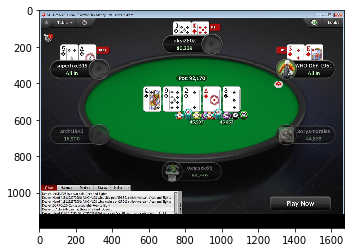

In [4]:
table = Image.open('res/tables/004.jpeg').resize((1674, 1193), resample=Image.BICUBIC)

plt.imshow(table)
(100/70.0, 140/98.0), 1/1.4285
(1172*1.4285714285714286, 835*1.4285714285714286)

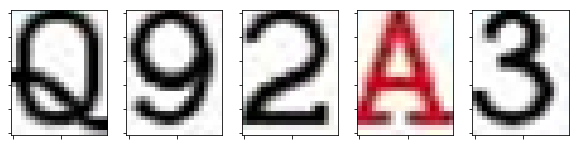

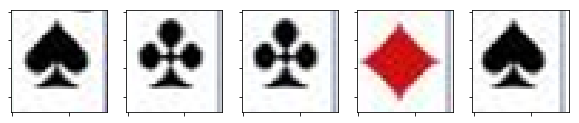

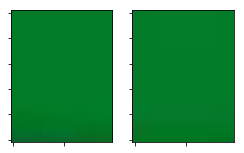

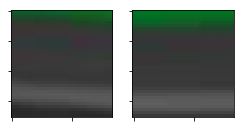

In [5]:
def crop(canvas, offset, size):
    (offset_x, offset_y) = offset
    (width, height) = size
    return canvas.crop((offset_x, offset_y, offset_x + width, offset_y + height))


def suit(canvas):
    offset = (0, 34)
    size = (34, 36)
    return crop(canvas, offset, size)


def rank(canvas):
    offset = (7, 9)
    size = (20, 26)
    return crop(canvas, offset, size)


def card(canvas, idx, padding):
    width = 100
    size = (width, 140)
    offset = ((width + padding) * idx, 0)
    return crop(canvas, offset, size)


def board(table):
    table = table.resize((1675, 1193), resample=Image.BICUBIC)
    offset = (572, 420)
    size = (600, 400)
    board_canvas = crop(table, offset, size)
    cards = [card(board_canvas, idx, padding = 9) for idx in range(0, 5)]
    ranks_suits = [(rank(c), suit(c)) for c in cards]
    return zip(*ranks_suits)


def hand(table):
    table = table.resize((1675, 1193), resample=Image.BICUBIC)
    offset = (735, 749)
    size = (600, 400)
    hand_canvas = crop(table, offset, size)
    cards = [card(hand_canvas, idx, padding = 0) for idx in range(0, 2)]
    ranks_suits = [(rank(c), suit(c)) for c in cards]
    return zip(*ranks_suits)


(board_ranks, board_suits) = board(table)
(hand_ranks, hand_suits) = hand(table)

plotting.stack_images(board_ranks)
plotting.stack_images(board_suits)
plotting.stack_images(hand_ranks)
plotting.stack_images(hand_suits)